In [11]:
# !pip install spacy
# !python -m spacy download en_core_web_md
# !pip install scikit-learn

# !pip install umap-learn

In [ ]:
import sys

import spacy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

sys.path.append("..")
from src.make_data import get_long_text_summary


sys.tracebacklimit = 0 # easier to see problems
plt.rcParams["figure.figsize"] = (8, 6)

In [9]:


# Load the spaCy model
nlp = spacy.load("en_core_web_md")  # Use en_core_web_lg for more accuracy

def cluster_words(words, eps=0.5, min_samples=2):
    """
    Groups words by semantic similarity using spaCy vectors and DBSCAN clustering.
    
    Args:
        words (list of str): List of words or short phrases to cluster.
        eps (float): DBSCAN epsilon parameter (maximum distance for a cluster).
        min_samples (int): DBSCAN min_samples parameter (minimum words per cluster).
        
    Returns:
        pd.DataFrame: DataFrame with words and their assigned cluster.
    """
    # Create spaCy vectors for each word
    vectors = np.array([nlp(word).vector for word in words])
    
    # Normalize vectors to unit length (optional but often helpful)
    vectors = np.nan_to_num(vectors)  # Handle NaNs in case of OOV words
    
    # Compute DBSCAN clustering
    clustering = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine').fit(vectors)
    
    # Assign clusters to words
    cluster_labels = clustering.labels_
    
    # Create a DataFrame for easy inspection
    clustered_df = pd.DataFrame({"Word": words, "Cluster": cluster_labels})
    return clustered_df

# Example usage
words = ["apple", "banana", "fruit", "dog", "cat", "animal", "car", "vehicle", "bike", "bus"]
result = cluster_words(words, eps=0.3, min_samples=2)
print(result)


      Word  Cluster
0    apple        0
1   banana        0
2    fruit        0
3      dog        1
4      cat        1
5   animal       -1
6      car       -1
7  vehicle       -1
8     bike       -1
9      bus       -1


In [12]:
import sys

# import matplotlib.pyplot as plt
# import numpy as np
# import missingno as msno
# import pandas as pd
# import pingouin as pg # gives confidence intervals with estimates
# import seaborn as sns




In [13]:
get_long_text_summary(df, "plot_keywords")

NameError: name 'df' is not defined

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 473.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.1/31.1 MB 7.9 MB/s eta 0:00:0000:0100:01


/Users/ryanhealy/Desktop/projects/interview/The-Zebra-Interview/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/ryanhealy/Desktop/projects/interview/The-Zebra-Interview/.venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


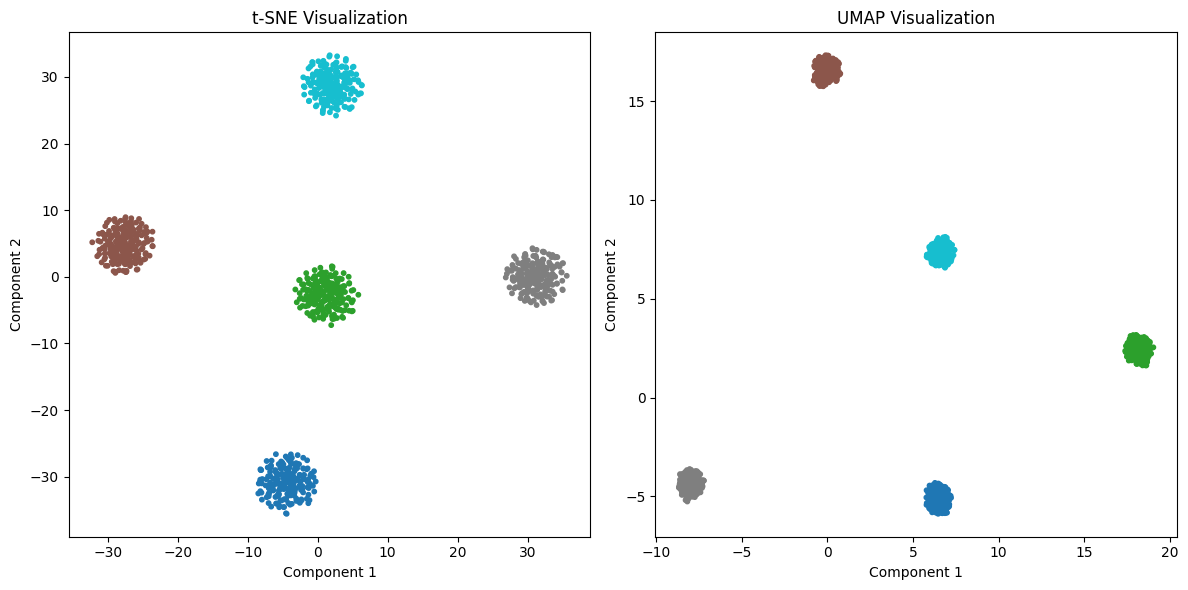

In [10]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 1000
n_features = 50
n_clusters = 5
data, labels = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
data_tsne = tsne.fit_transform(data)

# Apply UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
data_umap = umap_reducer.fit_transform(data)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

# t-SNE Plot
axes[0].scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='tab10', s=10)
axes[0].set_title("t-SNE Visualization")
axes[0].set_xlabel("Component 1")
axes[0].set_ylabel("Component 2")

# UMAP Plot
axes[1].scatter(data_umap[:, 0], data_umap[:, 1], c=labels, cmap='tab10', s=10)
axes[1].set_title("UMAP Visualization")
axes[1].set_xlabel("Component 1")
axes[1].set_ylabel("Component 2")

plt.tight_layout()
plt.show()
